<a href="https://colab.research.google.com/github/aditi2212-bot/Project-1-Phising-/blob/main/Project_5_Parkinson%E2%80%99s_Disease_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parkinson’s Disease Detection (Using Vocal Biomarkers)

## 1. Objective
To build an Artificial Neural Network (ANN) that predicts whether a person has Parkinson’s disease using vocal biomarkers, enabling early detection support in healthcare.


## 2. Dataset Loading + Exploration
- **Source**: UCI Machine Learning Repository — Parkinson’s Data Set  
- **Description**: 195 voice recordings from 31 individuals (23 with Parkinson’s, 8 healthy).  
- **Features**: 22 biomedical voice measures (e.g., jitter, shimmer, NHR, HNR).  
- **Target**: `status` (1 = Parkinson’s, 0 = healthy).


In [ ]:
# Dataset

import pandas as pd
from google.colab import files

# Upload parkinsons.data file (download from UCI repository)
uploaded = files.upload()

df = pd.read_csv("parkinsons.data")
df.head()


Saving parkinsons.data to parkinsons.data


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


/tmp/ipython-input-3570628228.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='viridis')


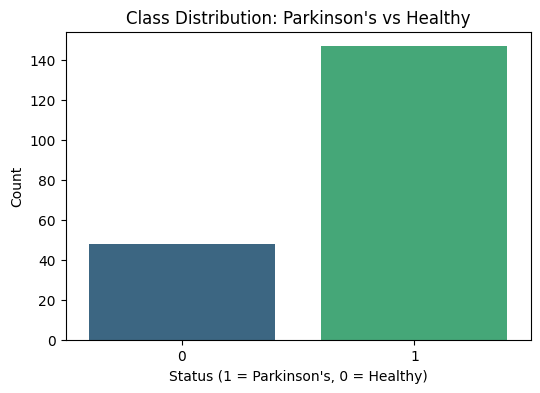

status
1    147
0     48
Name: count, dtype: int64


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='status', data=df, palette='viridis')
plt.title("Class Distribution: Parkinson's vs Healthy")
plt.xlabel("Status (1 = Parkinson's, 0 = Healthy)")
plt.ylabel("Count")
plt.show()

print(df['status'].value_counts())


# Correlation Heatmap
This heatmap shows correlations between the vocal biomarkers (features). It helps us identify which features are strongly related to each other and the target (status). For example, features like jitter and shimmer often show high correlation with Parkinson’s disease.

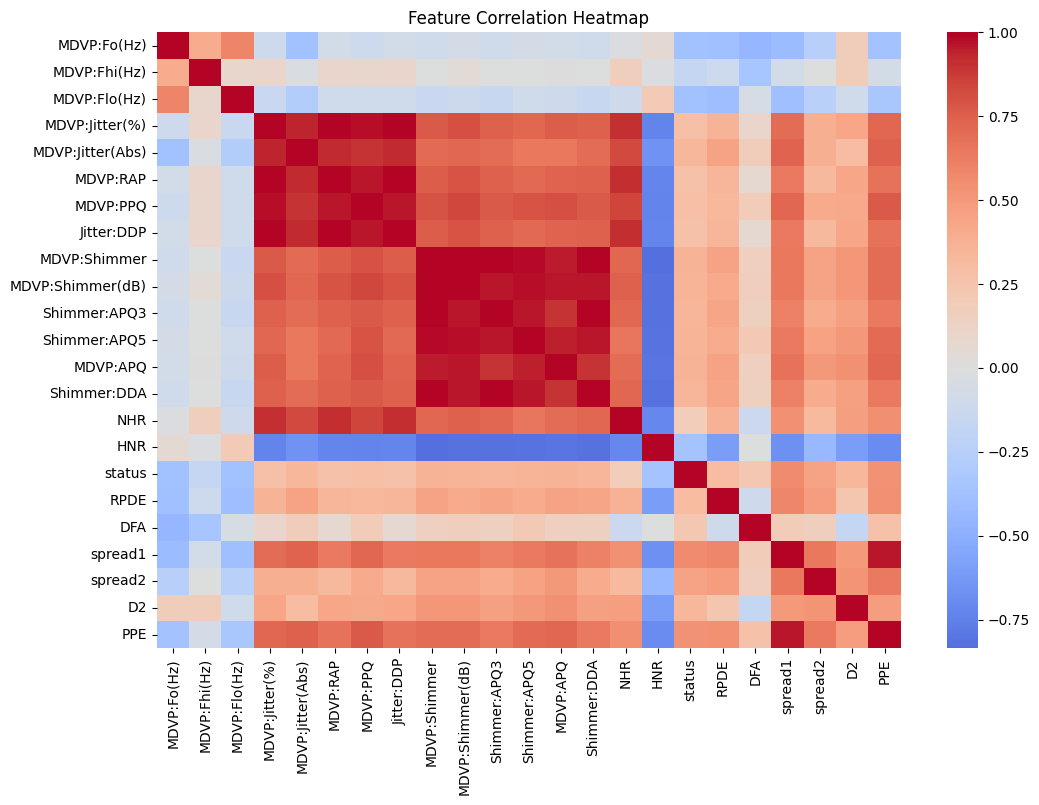

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.drop('name', axis=1).corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


## 3. Preprocessing
- Dropped `name` column (identifier).  
- Split data into train/test (80/20) with stratification.  
- Standardized features using `StandardScaler`.  


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop name column
X = df.drop(['name','status'], axis=1)
y = df['status']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape


((156, 22), (39, 22))

## 4.Baseline Comparison (Logistic Regression & SVM)
Before building a deep learning model, I trained traditional machine learning models (Logistic Regression and Support Vector Machine). This provides a baseline for comparison, so we can evaluate whether the ANN improves performance over simpler approaches.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print("="*50)

# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Results")
print(classification_report(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, svm.predict_proba(X_test)[:,1]))


Logistic Regression Results
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

ROC AUC: 0.9241379310344828
SVM Results
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39

ROC AUC: 0.9551724137931035


## 5.ANN Model Architecture
- Input: 22 features (vocal metrics)  
- Hidden layers:  
  - Dense(128, ReLU) → Batch Normalization → Dropout(0.3)  
  - Dense(64, ReLU) → Dropout(0.2)  
- Output: Dense(1, Sigmoid)  
- Optimizer: Adam (lr = 0.001)  
- Loss: Binary Crossentropy  


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy','AUC'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 256 (1.00 KB)

## 6.Training
- Batch size: 16  
- Epochs: 100 (with Early Stopping)  
- Validation split: 15%  


In [ ]:

es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_split=0.15,
                    epochs=100,
                    batch_size=16,
                    callbacks=[es])


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - AUC: 0.7357 - accuracy: 0.7854 - loss: 0.5127 - val_AUC: 0.8125 - val_accuracy: 0.7083 - val_loss: 0.5658
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.8760 - accuracy: 0.8304 - loss: 0.3683 - val_AUC: 0.8438 - val_accuracy: 0.6667 - val_loss: 0.5256
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8748 - accuracy: 0.8225 - loss: 0.3894 - val_AUC: 0.8562 - val_accuracy: 0.7500 - val_loss: 0.4891
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.9440 - accuracy: 0.8935 - loss: 0.2688 - val_AUC: 0.8812 - val_accuracy: 0.8333 - val_loss: 0.4633
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.9568 - accuracy: 0.9240 - loss: 0.2324 - val_AUC: 0.8875 - val_accuracy: 0.8750 - val_loss: 0.4407
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.9288 - accuracy: 0.8648 - loss: 0.2938 - val_AUC: 0.8875 - val_accuracy: 0.8750 - val_loss: 0.4250
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - 

# Learning Curves
These plots show how the model’s training and validation loss/accuracy change across epochs. A small gap between train and validation curves means the model is generalizing well, while a large gap would indicate overfitting.

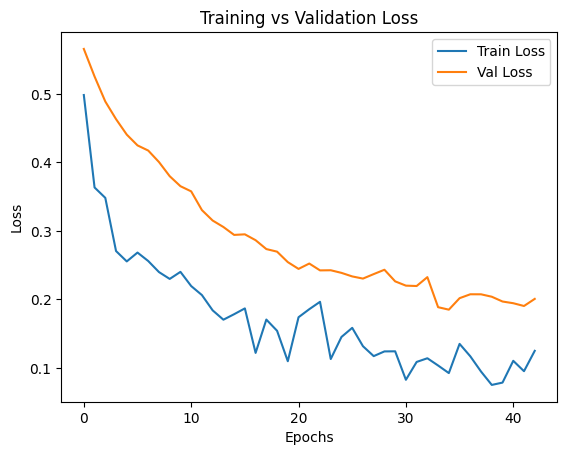

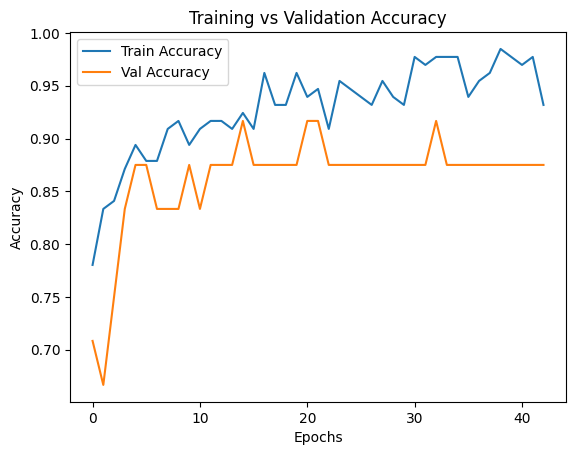

In [ ]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()


## 7.Evaluation
- Metrics: Accuracy, Precision, Recall, F1-score, ROC-AUC  
- Plots: Confusion matrix & ROC curve  


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

ROC AUC: 0.9793103448275862


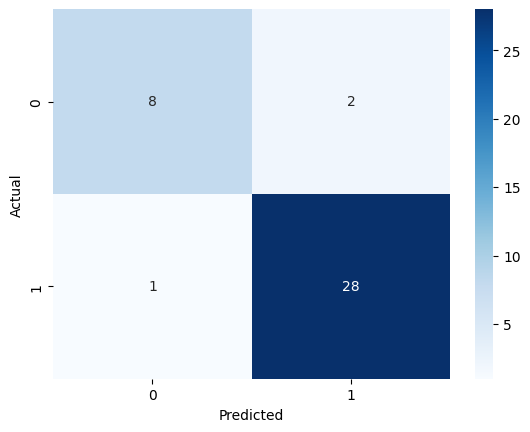

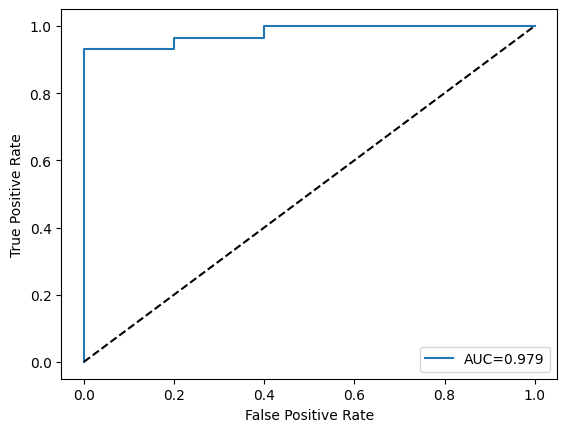

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# SHAP Explainability
SHAP (SHapley Additive exPlanations) helps interpret black-box models like neural networks. The summary plot shows which features (voice biomarkers) have the most influence on the model’s predictions. This adds clinical insight — for example, features such as jitter and NHR may have stronger contributions to detecting Parkinson’s.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  0%|          | 0/39 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
157/157 ━━

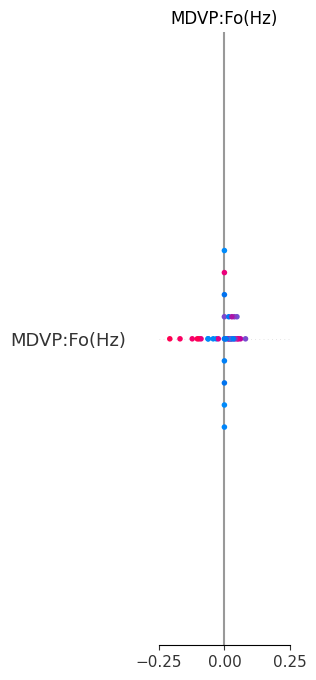

In [ ]:
!pip install shap
import shap

# Use a smaller background sample for speed
explainer = shap.KernelExplainer(model.predict, X_train[:50])
shap_values = explainer.shap_values(X_test[:50], nsamples=100)

# Summary plot
shap.summary_plot(shap_values, X_test[:50], feature_names=df.drop(['name','status'], axis=1).columns)


## 8.MFCC Audio Demo
To extend this project beyond the dataset, I added a prototype for real audio input. Here, we can upload a .wav file, extract MFCC (Mel Frequency Cepstral Coefficients) features using Librosa, and prepare them for prediction. Although the current ANN was trained on structured UCI features, this demonstrates how the system could be adapted for real-time voice-based Parkinson’s detection.

In [ ]:

import librosa
import numpy as np
from google.colab import files

# Upload a WAV file (record a sample saying 'ahhh' or any speech)
uploaded = files.upload()
audio_path = list(uploaded.keys())[0]

# Extract MFCC features (mean + std)
def extract_mfcc_features(path, n_mfcc=20):
    y, sr = librosa.load(path, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = mfcc.mean(axis=1)
    mfcc_std = mfcc.std(axis=1)
    return np.concatenate([mfcc_mean, mfcc_std])

# Convert audio to features
mfcc_features = extract_mfcc_features(audio_path)
mfcc_features = mfcc_features.reshape(1, -1)

#  IMPORTANT: Our trained ANN was built on UCI dataset features,
# so the dimensions won't match directly.
# For demo: We'll just print extracted MFCCs length.
print("MFCC feature vector length:", mfcc_features.shape)

# Future work: Train ANN separately on MFCC dataset
# For now: Show how raw audio → features → ready for model input


Saving Record (online-voice-recorder.com).mp3 to Record (online-voice-recorder.com).mp3
MFCC feature vector length: (1, 40)


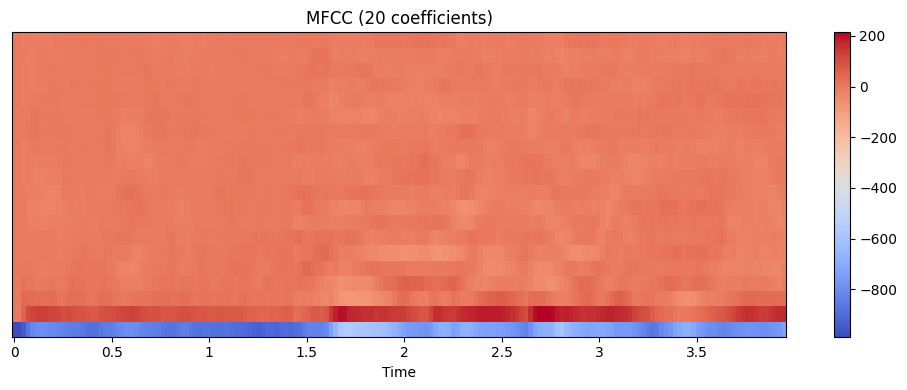

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

y, sr = librosa.load(audio_path, sr=22050)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title("MFCC (20 coefficients)")
plt.tight_layout()
plt.show()


## 9.Extensions
- Baseline Comparison: Logistic Regression and SVM used as benchmarks for ANN performance.

- Explainability: SHAP to interpret important vocal biomarkers (e.g., jitter, NHR).

- Real-Time Audio Demo: Prototype MFCC feature extraction from real recordings to simulate real-world application.

- Deployment: Future work includes a web app (Streamlit/Flask) for patient voice uploads.

- Scalability: Train CNN/LSTM models on spectrograms for improved feature learning from raw audio.

- Clinical Validation: Extend evaluation on larger, real-world datasets with medical collaboration.






## 10.Tools
- Programming Language: Python
- Environment: Google Colab
- Data Handling & Preprocessing: Pandas, NumPy, Scikit-learn (StandardScaler, train_test_split)
- Visualization: Matplotlib, Seaborn
- Deep Learning: TensorFlow, Keras
- Explainability: SHAP
- Audio Processing (extension): Librosa (MFCC extraction & visualization)
- Future Deployment (extension): Streamlit / Flask
